# Lab Instructions

You have been hired by a record executive to design a guaranteed smash hit song based on data.  The exec has decided that if you make a song that has all the most popular features of recent songs then it will definitely be a hit.  So if - for example - the most common key in the Spotify data is C# then we would want the song we are designing to also be in C#.  If a "typical" value of BPM is between 120 and 130 then we would want the song we are designing to also have a tempo between 120 and 130 BMP.

Visualize and describe the distribution of:
* BPM
* Key
* Mode
* Danceability
* Energy
* Speechiness
* Acousticness

Based on your visualizations and calculations, what values for each of these features would make a song a guaranteed smash hit?  For quantitative features, you should propose a range of values.

Use a large language model to help you write code to identify if there are any songs in the Spotify dataset that meet all of the criteria we determined.  What is/are the artist(s) and title(s) of the song?  Were any of these songs actually popular?

Pick a song that you know was a smash hit. How do the values of BPM, key, mode, danceability, etc. compare to other songs? 

**Hint:**  Import the Spotify data using `df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')`.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [12]:

filtered_df = df [(df['bpm'] >= 120) & (df['bpm'] <= 130) & (df['mode'] == 'Major') & (df['key'] == 'C#') ]

filtered_df.head()



,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
168,We Found Love,"Rihanna, Calvin Harris",2,2011,1,1,36843,21,1235005533,321,...,128,C#,Major,73,60,77,3,0,11,4
236,AMERICA HAS A PROBLEM (feat. Kendrick Lamar),"Kendrick Lamar, Beyoncï¿",2,2023,5,19,896,0,57089066,34,...,126,C#,Major,78,20,70,1,0,16,4
518,Need To Know,Doja Cat,1,2021,6,11,6672,0,1042568408,125,...,130,C#,Major,66,19,61,30,0,9,7
753,MANIAC,Stray Kids,1,2022,3,18,651,0,212234990,6,...,120,C#,Major,58,71,80,15,0,7,41
778,Dos Mil 16,Bad Bunny,1,2022,5,6,892,3,338422004,10,...,130,C#,Major,82,50,67,12,0,13,5


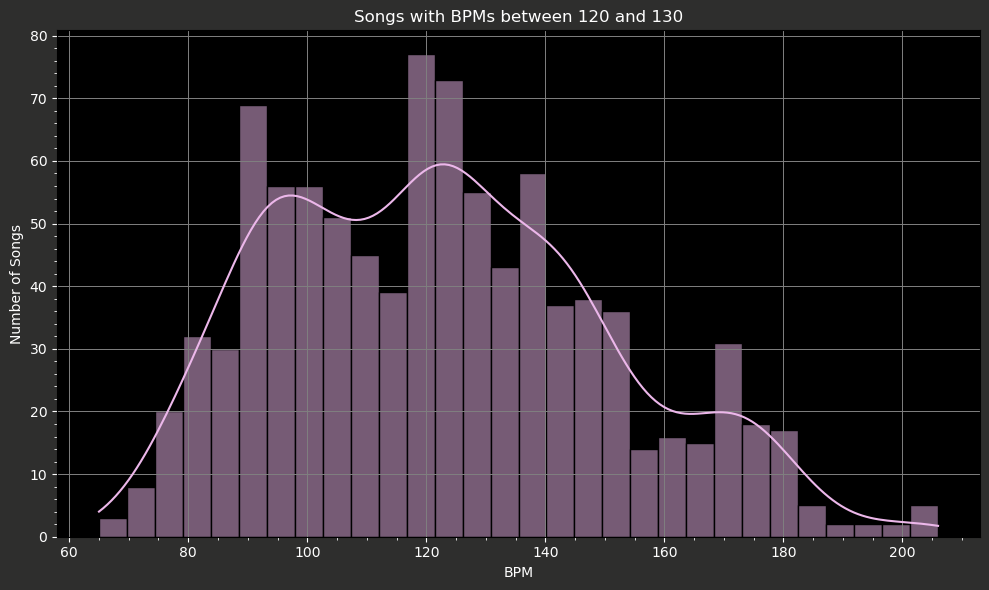

In [13]:
BPM_COUNT = df['bpm'].dropna().value_counts()


fig, ax = plt.subplots(figsize=(10, 6))

bpm_data = df[['bpm']].dropna()

sns.histplot(data = bpm_data, x= 'bpm',color = '#ecb7ea',bins=30, kde = True, edgecolor='black')

fig.set_facecolor('#2e2e2d')
ax.set_facecolor('black')

ax.grid(True, axis='y', linestyle='-', linewidth=.7, color='gray')
ax.grid(True, axis='x', linestyle='-', linewidth=.7, color='gray')
ax.tick_params(axis='both', which='minor', color='white')
ax.minorticks_on()
ax.set_title("Songs with BPMs between 120 and 130", color='white')
ax.set_xlabel("BPM", color='white')
ax.set_ylabel("Number of Songs", color='white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.tight_layout()
plt.show()

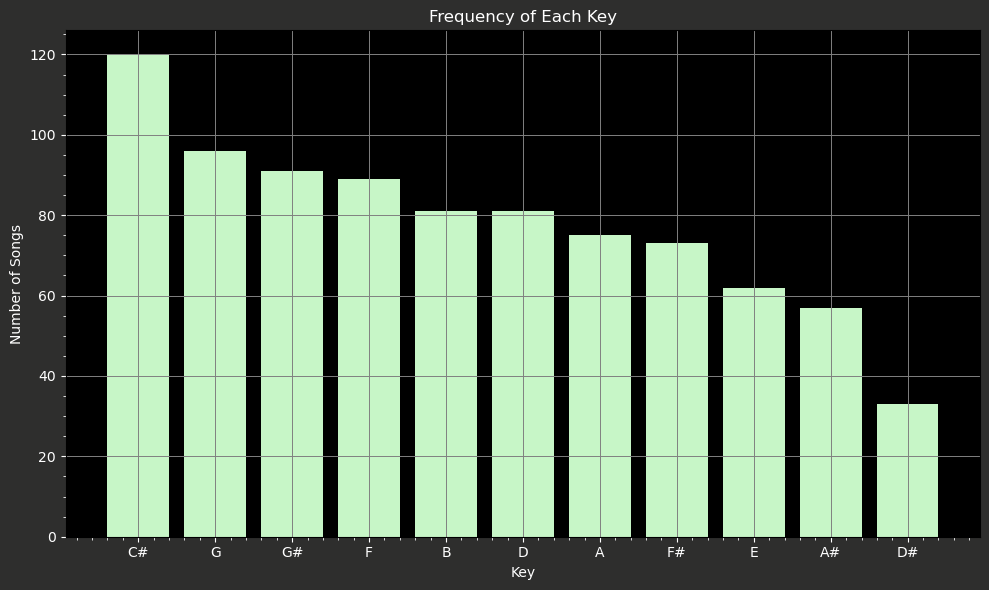

In [14]:
key_counts = df['key'].dropna().value_counts()

categories = key_counts.index
values = key_counts.values
fig, ax = plt.subplots(figsize=(10, 6))

fig.set_facecolor('#2e2e2d')
ax.set_facecolor('black')

ax.bar(categories, values, color='#c7f6c7')

ax.grid(True, axis='y', linestyle='-', linewidth=.7, color='gray')
ax.grid(True, axis='x', linestyle='-', linewidth=.7, color='gray')
ax.tick_params(axis='both', which='minor', color='white')
ax.minorticks_on()
ax.set_title("Frequency of Each Key", color='white')
ax.set_xlabel("Key", color='white')
ax.set_ylabel("Number of Songs", color='white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.tight_layout()
plt.show()


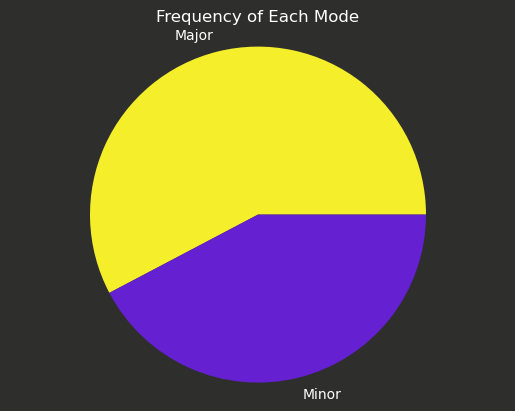

In [15]:
mode_counts = df['mode'].value_counts()

labels = mode_counts.index
sizes = mode_counts.values
colors = ['#f5ee2a', '#6521d1']
fig = plt.figure()

fig.set_facecolor('#2e2e2d')

# 2. Create the pie chart and change the label color
plt.pie(sizes, labels=labels, colors=colors, textprops={'color': 'white'})

# 3. Add a title and change its color
plt.title("Frequency of Each Mode", color='white')

plt.axis('equal')
plt.show()

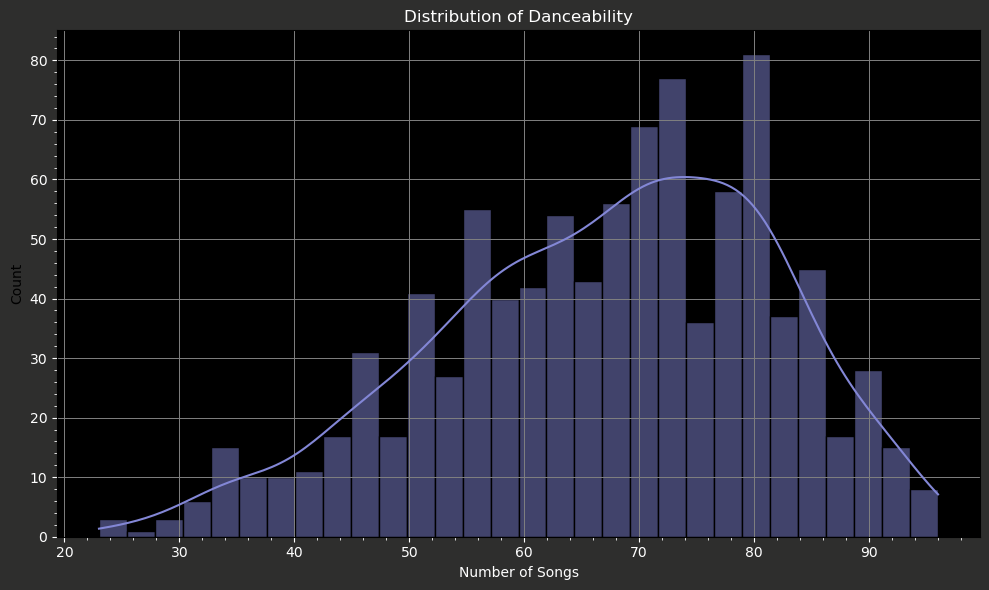

In [16]:
danceability_data = df['danceability_%'].dropna()

fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(danceability_data, bins=30,color = '#8387d6', edgecolor='black', kde = True)

fig.set_facecolor('#2e2e2d')
ax.set_facecolor('black')

ax.grid(True, axis='y', linestyle='-', linewidth=.7, color='gray')
ax.grid(True, axis='x', linestyle='-', linewidth=.7, color='gray')
ax.tick_params(axis='both', which='minor', color='white')
ax.minorticks_on()
ax.set_title("Distribution of Danceability", color='white')
ax.set_xlabel("Danceability %", color='white')
ax.set_xlabel("Number of Songs", color='white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.tight_layout()
plt.show()

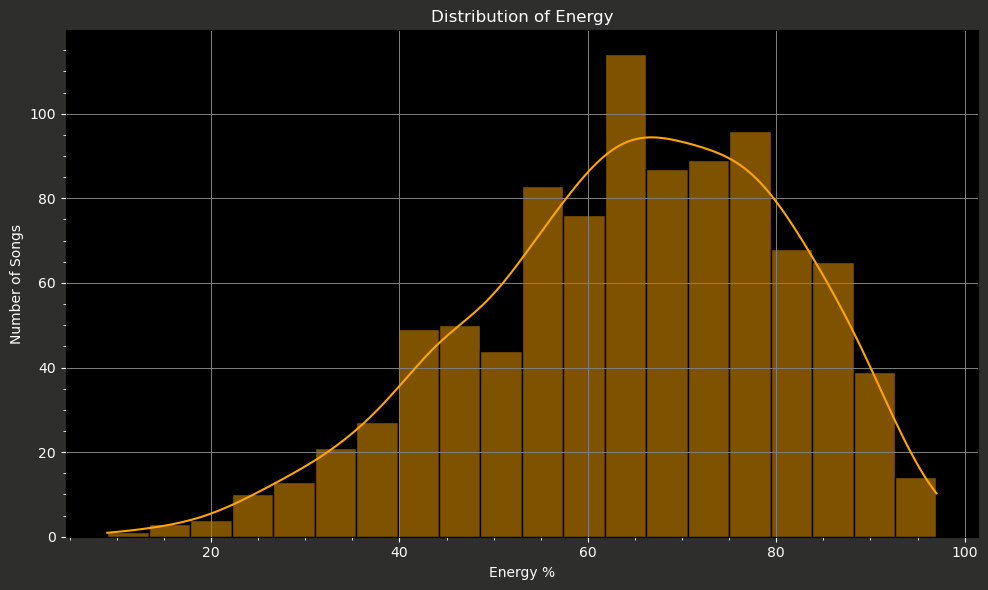

In [17]:

fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(data=df, x='energy_%', color='orange', bins=20, kde=True)

fig.set_facecolor('#2e2e2d')
ax.set_facecolor('black')

ax.grid(True, axis='y', linestyle='-', linewidth=.7, color='gray')
ax.grid(True, axis='x', linestyle='-', linewidth=.7, color='gray')
ax.tick_params(axis='both', which='minor', color='white')
ax.minorticks_on()
ax.set_title("Distribution of Energy", color='white')
ax.set_xlabel("Energy %", color='white')
ax.set_ylabel("Number of Songs", color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.tight_layout()
plt.show()

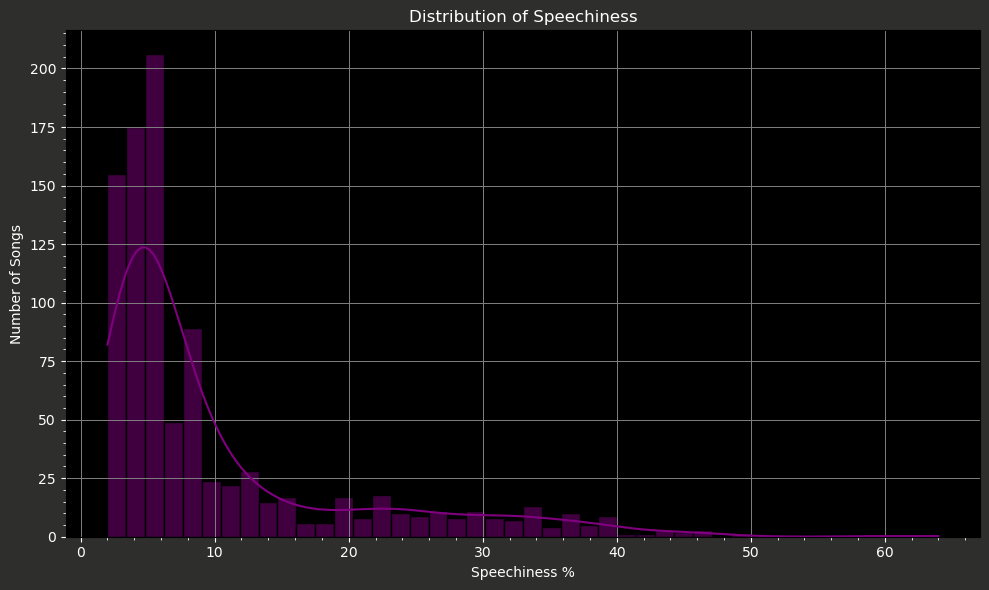

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(data=df, x='speechiness_%', kde=True, color='purple')


fig.set_facecolor('#2e2e2d')
ax.set_facecolor('black')

ax.grid(True, axis='y', linestyle='-', linewidth=.7, color='gray')
ax.grid(True, axis='x', linestyle='-', linewidth=.7, color='gray')
ax.tick_params(axis='both', which='minor', color='white')
ax.minorticks_on()
ax.set_title("Distribution of Speechiness", color='white')
ax.set_xlabel("Speechiness %", color='white')
ax.set_ylabel("Number of Songs", color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.tight_layout()
plt.show()

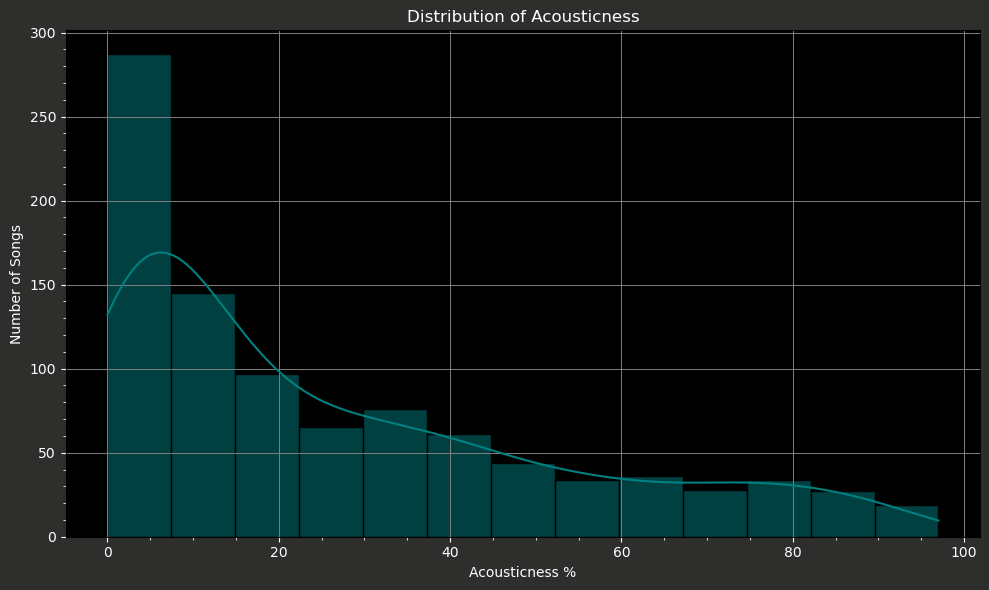

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(data=df, x='acousticness_%', kde=True, color='teal')


fig.set_facecolor('#2e2e2d')
ax.set_facecolor('black')

ax.grid(True, axis='y', linestyle='-', linewidth=.7, color='gray')
ax.grid(True, axis='x', linestyle='-', linewidth=.7, color='gray')
ax.tick_params(axis='both', which='minor', color='white')
ax.minorticks_on()
ax.set_title("Distribution of Acousticness", color='white')
ax.set_xlabel("Acousticness %", color='white')
ax.set_ylabel("Number of Songs", color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.tight_layout()
plt.show()

In [ ]:
bpm_low, bpm_high = df['bpm'].quantile(0.25), df['bpm'].quantile(0.75)
dance_low, dance_high = df['danceability_%'].quantile(0.25), df['danceability_%'].quantile(0.75)
energy_low, energy_high = df['energy_%'].quantile(0.25), df['energy_%'].quantile(0.75)
speech_low, speech_high = df['speechiness_%'].quantile(0.25), df['speechiness_%'].quantile(0.75)
acoustic_low, acoustic_high = df['acousticness_%'].quantile(0.25), df['acousticness_%'].quantile(0.75)

most_common_key = df['key'].mode()[0]
most_common_mode = df['mode'].mode()[0]


hit_songs = df[
    (df['bpm'].between(bpm_low, bpm_high)) &
    (df['key'] == most_common_key) &
    (df['mode'] == most_common_mode) &
    (df['danceability_%'].between(dance_low, dance_high)) &
    (df['energy_%'].between(energy_low, energy_high)) &
    (df['speechiness_%'].between(speech_low, speech_high)) &
    (df['acousticness_%'].between(acoustic_low, acoustic_high))
]




if hit_songs.empty:
    print("\nNo songs in the dataset perfectly match all the criteria.")
else:
    print(hit_songs.sort_values(by='streams', ascending=False)[['track_name', 'artist(s)_name', 'streams']])

--- The Song(s) That Fit the 'Smash Hit' Formula ---
             track_name artist(s)_name     streams
660  Ginseng Strip 2002      Yung Lean   240769997
518        Need To Know       Doja Cat  1042568408
